# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [2]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# A function that creates and trains the model

In [3]:
#Defining the function buildAndTrainModel which takes in inputs x and target y and trains the model

In [1]:
def buildAndTrainTheModel(x,y):

  # build the model
  ANNreg = nn.Sequential(
      nn.Linear(1,1),  # input layer
      nn.ReLU(),       # activation function
      nn.Linear(1,1)   # output layer
      )

  # loss and optimizer functions
  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=.05)


  #### train the model
  numepochs = 500
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # end training loop


  ### compute model predictions
  predictions = ANNreg(x) #Outputs the preidctions after all the trainign is finished


  # output:
  return predictions, losses

# A function that creates the data

In [5]:
def createTheData(m): #We need to vary the slopes later
  N = 50
  x = torch.randn(N,1) #Input random numbers of Gaussian distribution and standard deviation of 1
  y = m*x + torch.randn(N,1)/2 #target 
  return x,y


#Test the model once

In [6]:
x,y=createTheData(0.8) 

yHat,losses=buildAndTrainTheModel(x,y)
yHat=yHat.detach()

'''Why Use detach() in the above Context
1. Inference or Plotting:
When you're done with training and want to make predictions (or plot the results), you usually don't need the gradients anymore.
Using detach() ensures that you're working with a regular tensor that is independent of the computation graph, which makes it more efficient and faster to handle.
In your case, you're likely detaching yHat to plot the predictions or to evaluate the model's performance without the overhead of gradient tracking.
2. Memory Efficiency:
Gradient information and the computation graph can consume significant memory, especially with large models or datasets.
Detaching the tensor reduces memory usage because the computation graph is not stored for subsequent operations, which is beneficial when you're working with the model's outputs for analysis.
3. Preventing Unintended Calculations:
Sometimes, operations on tensors with gradient tracking can unintentionally affect the model's gradients or lead to errors if gradients are not required.
Detaching ensures that the predictions (yHat) are treated as regular data without any connection to the training process.'''

In [7]:
#now plot the loss vs epoch and read data vs predictions

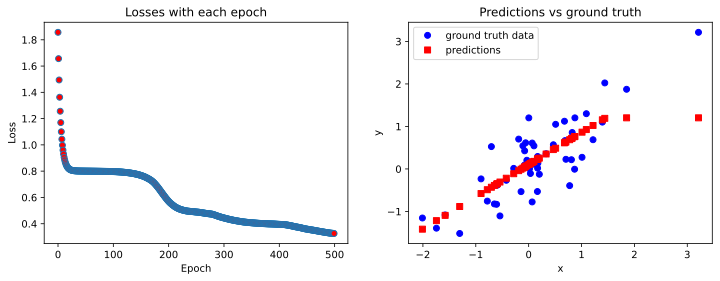

In [8]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

#plotting the first plot
ax[0].plot(losses.detach(),'o',markerfacecolor='r',linewidth=0.1)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Losses with each epoch')
ax[1].plot(x,y,'bo',label='ground truth data')
ax[1].plot(x,yHat,'rs',label='predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('Predictions vs ground truth')
ax[1].legend()
plt.show()

In [9]:
#calculating correlation between ground truth and predictions
correlation_predictions_ground_truth=np.corrcoef(yHat.T,y.T)[0,1] #calculating correlation between two tensors
print(correlation_predictions_ground_truth)
#rounding it off to three decimal places
print(correlation_predictions_ground_truth.round(3))

0.7782567205500299
0.778


In [2]:
#test the model once before you start running it for 3 hour and rwalising it is a mistake

# Now for the experiment!

In [10]:
#The set of slopes to simulate
slopes=np.linspace(-2,2,21) #Taing 10 different slopes

numExps=10 #repeating the entire experiment 10 times

results=np.zeros((len(slopes),numExps,2)) #Shape of the array, passed as a tuple
#We need a matrix, which stores, slopes tried, number of experiments with each slope and 
# 2 denotes, one column for corrcoeff and another for storing losses

for slopei in range(len(slopes)):
    for N in range(numExps):
        #Creating the dataset and running the model
        x,y=createTheData(slopes[slopei])
        yHat,losses=buildAndTrainTheModel(x,y)
        yHat=yHat.detach()

        #Store losses and performances of each slope
        results[slopei,N,0]=losses[-1]
        results[slopei,N,1]=np.corrcoef(y.T,yHat.T)[0,1]


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [11]:
#What do we do if the model didnt do well?? we can set the correlation to zero in case any nans pop up
results[np.isnan(results)]=0

In [17]:
#Plotting the above results


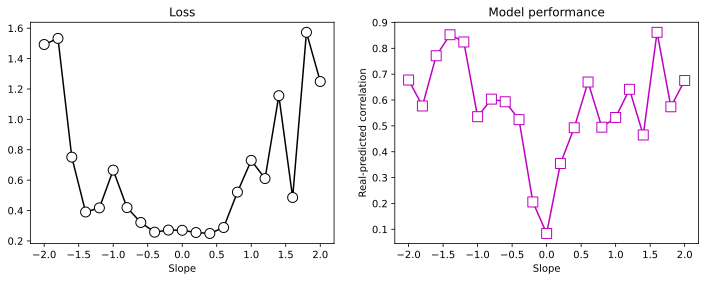

In [19]:
# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
#It plots mean loss from each of the slopes for 10 experiments for each slope as we have done above
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')#In terms of correlation

plt.show()

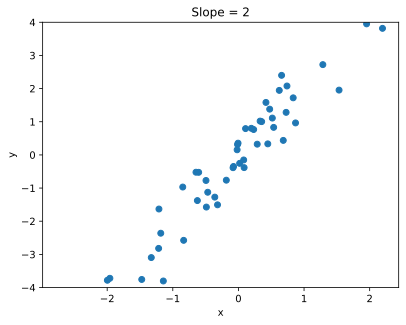

In [23]:
# extra code to visualize data with different slopes

m = 2

x,y = createTheData(m)

plt.title('Slope = ' + str(m))
plt.plot(x,y,'o')
plt.ylim([-4,4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()